# Project 3 : Predicting Admission of the students.

## Objective
Predict the chance of student getting admitted.

## Summary
The data is related to various exam scores & other information related to student.By taking these information as a inputs & targets we train our model for predicting the chance of student getting admitted in the college.

## Data info
#####  Each row represents a student
##### There are total 9 columns in our datasets
##### First 8 columns our the inputs we are going to take
##### The 9th column is the column we our going to take as a target 

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
from sklearn.linear_model import LinearRegression

## Load the data

In [3]:
raw_data = pd.read_csv('D:\Admission_Predict.csv')

In [4]:
raw_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


### We will drop the 'Serial no.' column as its not useful for us

In [5]:
data = raw_data.drop('Serial No.',axis=1)
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [6]:
data.describe(include='all')

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Check for missing values

In [7]:
data.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Exploring the features & their outliers

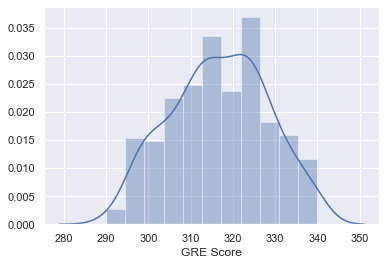

In [8]:
sns.distplot(data['GRE Score'])

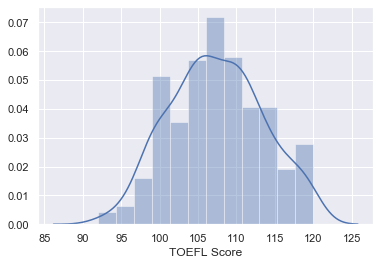

In [9]:
sns.distplot(data['TOEFL Score'])

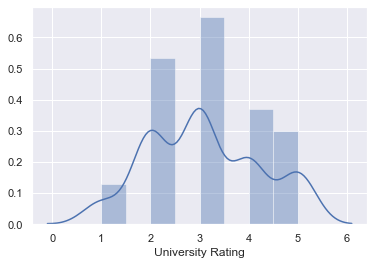

In [10]:
sns.distplot(data['University Rating'])

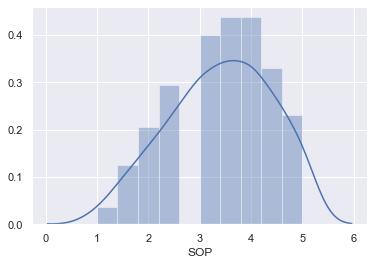

In [11]:
sns.distplot(data['SOP'])

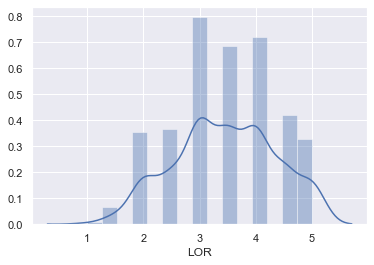

In [12]:
sns.distplot(data['LOR'])

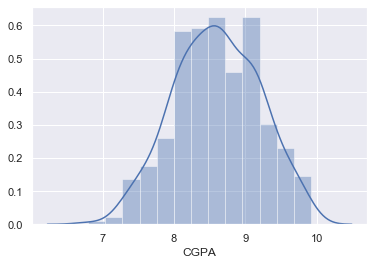

In [13]:
sns.distplot(data['CGPA'])

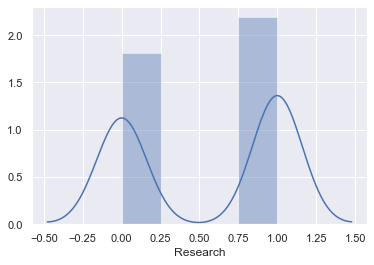

In [14]:
sns.distplot(data['Research'])

## Select the Inputs & Targets
### Here we have stored inputs in x variable & targets in y variable.

In [15]:
x = data[['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research']]
y = data['Chance of Admit']

## Linear Regression

In [16]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Coefficients

In [17]:
reg.coef_

array([ 0.00173741,  0.00291958,  0.00571666, -0.00330517,  0.02235313,
        0.11893945,  0.02452511])

## Intercepts

In [18]:
reg.intercept_

-1.2594324782480177

## Calculating the R-squared

In [19]:
reg.score(x,y)

0.8034713719824393

## Calculating adjusted R-squared

### Formula for calculating adjusted R-squared
#### Adj. Rsquared = 1-(1-Rsquared) * n-1/n-p-1
#### where n is the number of observations & p is the number of predictors

In [20]:
x.shape

(400, 7)

In [21]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

In [22]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7999619321964115

### Hence Adjusted R-squared is almost equal to R-squared . Hence there might be some features in our dataset which may not have any predictive power.

In [23]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Feature Selection

In [24]:
from sklearn.feature_selection import f_regression

### We will calculate the p-values of each variable

### If a variable has p-value > 0.05 we can ignore it.

In [25]:
f_regression(x,y)

(array([ 720.55424286,  667.94115577,  407.46733202,  334.44372569,
         323.9967663 , 1278.73445335,  175.51397562]),
 array([2.45811241e-091, 3.63410218e-087, 6.63501948e-063, 1.14109467e-054,
        2.00731452e-053, 2.33651400e-126, 1.91817338e-033]))

### From above output the 1st array gives us F-statistics & the 2nd array gives us the p-values.

In [26]:
p_values = f_regression(x,y)[1]

In [27]:
p_values

array([2.45811241e-091, 3.63410218e-087, 6.63501948e-063, 1.14109467e-054,
       2.00731452e-053, 2.33651400e-126, 1.91817338e-033])

### As these above p-values are too long or complicated we will just take 3 digits after the point.

In [28]:
p_values.round(3)

array([0., 0., 0., 0., 0., 0., 0.])

### As we can see the p-values of each variable are smaller than 0.05 .Hence all features have predictive power.

## Predicting outputs for our new data which we will be giving to our trained model.

In [29]:
new_data = pd.DataFrame(data=[[325,110,3,5.0,4.5,8.45,0],[312,117,4,4.5,4.0,9.11,1]],columns=['GRE Score','TOEFL Score','University Rating','SOP','LOR','CGPA','Research'])
new_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,325,110,3,5.0,4.5,8.45,0
1,312,117,4,4.5,4.0,9.11,1


In [30]:
reg.predict(new_data)

array([0.73263132, 0.82969983])